# Week 1 Assignment begins here

### This notebook will be mainly used for the Capstone project, which is part of Coursera's IBM Data Science Professional Certificate.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Week 3 Assignment begins here

### Week 3 Submission 1 begins here

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(url)

In [5]:
soup = BeautifulSoup(html_data.text, 'html.parser')

In [6]:
toronto_data = pd.DataFrame(columns=['PostalCode', 'Borough', 'Neighborhood'])

for table_row in soup.find('tbody').find_all('tr'):
    for table_entry in table_row.find_all('td'):
        table_entry_text = table_entry.text.strip()
        postalCode = table_entry_text[0:3]
        borough_neighborhood = table_entry_text[3:]
        
        if borough_neighborhood.lower() == 'not assigned':
            continue
        
        borough_neighborhood = borough_neighborhood.split('(')
        borough = borough_neighborhood[0].strip()
        neighborhood = borough_neighborhood[1].replace(')', ' ').strip()
        
        toronto_data = toronto_data.append({'PostalCode':postalCode, 'Borough':borough, \
                                            'Neighborhood':neighborhood}, ignore_index=True)

The following lines of code are meant to clean up data for postal codes M7R, M5W, and M7Y.

In [7]:
toronto_data[toronto_data['PostalCode'] == 'M7R']

,PostalCode,Borough,Neighborhood
76,M7R,MississaugaCanada Post Gateway Processing Centre,Enclave of L4W


In [8]:
toronto_data.loc[toronto_data['PostalCode'] == 'M7R', 'Borough'] = 'Mississauga'
toronto_data[toronto_data['PostalCode'] == 'M7R']

,PostalCode,Borough,Neighborhood
76,M7R,Mississauga,Enclave of L4W


In [9]:
toronto_data[toronto_data['PostalCode'] == 'M5W']

,PostalCode,Borough,Neighborhood
92,M5W,Downtown TorontoStn A PO Boxes25 The Esplanade,Enclave of M5E


In [10]:
toronto_data.loc[toronto_data['PostalCode'] == 'M5W', 'Borough'] = 'Downtown Toronto'
toronto_data[toronto_data['PostalCode'] == 'M5W']

,PostalCode,Borough,Neighborhood
92,M5W,Downtown Toronto,Enclave of M5E


In [11]:
toronto_data[toronto_data['PostalCode'] == 'M7Y']

,PostalCode,Borough,Neighborhood
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L


In [12]:
toronto_data.loc[toronto_data['PostalCode'] == 'M7Y', 'Borough'] = 'East Toronto'
toronto_data[toronto_data['PostalCode'] == 'M7Y']

,PostalCode,Borough,Neighborhood
100,M7Y,East Toronto,Enclave of M4L


In [13]:
toronto_data

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Enclave of M4L
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


In [14]:
toronto_data.shape

(103, 3)

### Week 3 Submission 2 begins here

The CSV file was used, since the geocoder took too much processing time.

In [15]:
!wget -q -O 'Geospatial_Coordinates.csv' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv

In [16]:
toronto_coordinates = pd.read_csv('Geospatial_Coordinates.csv')
toronto_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


The following join adds the latitude and longitude coordinates to the neighborhood dataframe.

In [17]:
toronto_data = toronto_data.set_index('PostalCode').join(toronto_coordinates.set_index('Postal Code'))
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
PostalCode,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


Per the info below, all postal codes have (non-null) latitude and longitude values.

In [18]:
toronto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, M3A to M8Z
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       103 non-null    object 
 1   Neighborhood  103 non-null    object 
 2   Latitude      103 non-null    float64
 3   Longitude     103 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.1+ KB


In [19]:
toronto_data.reset_index(inplace=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


### Week 3 Submission 3 begins here

#### First, create a map of Toronto neighborhoods.

In [48]:
import folium
from IPython.display import Image

In [21]:
map_toronto = folium.Map(location=[43.654260, -79.360636])

for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], \
                                           toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(location=[lat,lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc',\
                       fill_opacity=0.7, parse_html=False).add_to(map_toronto)

map_toronto

Since GitHub cannot display Folium maps, the Image library is used for display purposes.

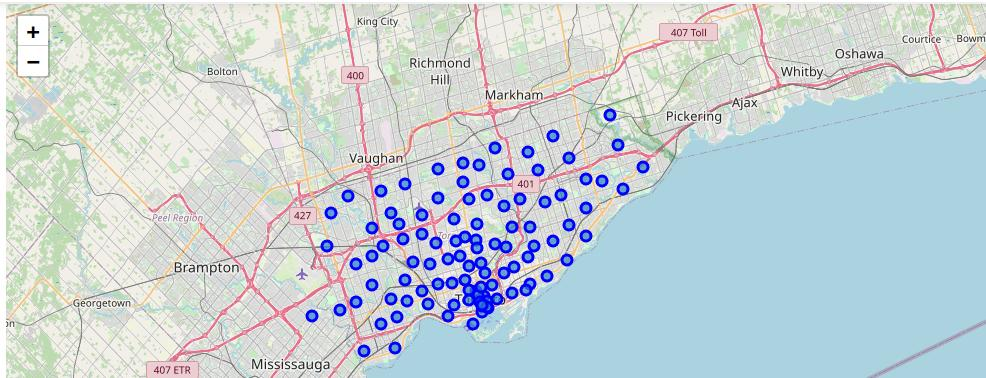

In [49]:
Image('Toronto_neighborhoods.jpg')

#### With Foursquare credentials, get venues in each Toronto neighborhood.  Note that unless below, all neighborhoods scraped from the web will be included for analysis.

In [22]:
with open('Foursquare_credentials.txt', 'r') as f:
    lines = f.readlines()

CLIENT_ID = lines[0].strip()
CLIENT_SECRET = lines[1].strip()
VERSION = '20180605'
LIMIT = 100

In [23]:
import json
from pandas import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [24]:
def create_url(neighborhood_latitude, neighborhood_longitude):
    url = 'https://api.foursquare.com/v2/venues/search?client_id='+str(CLIENT_ID)
    url = url+'&client_secret='+str(CLIENT_SECRET)
    url = url+'&ll='+str(neighborhood_latitude)+','+str(neighborhood_longitude)
    url = url+'&v='+str(VERSION)
    url = url+'&radius=500'
    url = url+'&limit='+str(LIMIT)
    
    return url

In [25]:
# function that extracts the category of the venue, from New York project
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): # from New York project
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


#### Get venue data for all Toronto neighborhoods.

In [28]:
toronto_venues = getNearbyVenues(toronto_data['Neighborhood'], toronto_data['Latitude'], \
                                   toronto_data['Longitude'])

Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills North
Parkview Hill / Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
The Danforth  East
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village

In [29]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
...,...,...,...,...,...,...,...
2131,Mimico NW / The Queensway West / South of Bloo...,43.628841,-79.520999,Islington Florist & Nursery,43.630156,-79.518718,Flower Shop
2132,Mimico NW / The Queensway West / South of Bloo...,43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
2133,Mimico NW / The Queensway West / South of Bloo...,43.628841,-79.520999,Value Village,43.631269,-79.518238,Thrift / Vintage Store
2134,Mimico NW / The Queensway West / South of Bloo...,43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


#### Dataframe below shows venue counts by neighborhood.  Note that no venues were obtained for three neighborhoods: Islington Avenue, York Mills / Silver Hills, Upper Rouge.  Therefore, these neighborhoods will be omitted from clustering.

In [30]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
Alderwood / Long Branch,7,7,7,7,7,7
Bathurst Manor / Wilson Heights / Downsview North,23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
Bedford Park / Lawrence Manor East,24,24,24,24,24,24
...,...,...,...,...,...,...
Willowdale South,34,34,34,34,34,34
Willowdale West,7,7,7,7,7,7
Woburn,4,4,4,4,4,4


In [31]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 276 unique categories.


#### The steps below are used to find the 10 most common venues in each neighborhood.

In [32]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

toronto_onehot.head()

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
toronto_onehot.shape

(2136, 276)

In [34]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Alderwood / Long Branch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bathurst Manor / Wilson Heights / Downsview North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bedford Park / Lawrence Manor East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale South,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.029412,0.0,0.0,0.0,0.0,0.0
95,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
96,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0


In [35]:
toronto_grouped.shape

(99, 276)

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], \
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Skating Rink,Accessories Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
1,Alderwood / Long Branch,Pizza Place,Gym,Sandwich Place,Dance Studio,Coffee Shop,Pub,Mobile Phone Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant
2,Bathurst Manor / Wilson Heights / Downsview North,Bank,Coffee Shop,Intersection,Bridal Shop,Shopping Mall,Park,Middle Eastern Restaurant,Mobile Phone Shop,Sandwich Place,Supermarket
3,Bayview Village,Japanese Restaurant,Bank,Café,Chinese Restaurant,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Accessories Store
4,Bedford Park / Lawrence Manor East,Italian Restaurant,Sandwich Place,Coffee Shop,Pharmacy,Indian Restaurant,Fast Food Restaurant,Butcher,Café,Liquor Store,Sushi Restaurant


#### After trying different number of clusters, six clusters were deemed reasonable for analysis. 

In [38]:
# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Fast Food Restaurant,Food & Drink Shop,Park,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Mexican Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Grocery Store,Nail Salon,Coffee Shop,Hockey Arena,Portuguese Restaurant,Accessories Store,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,1.0,Coffee Shop,Café,Bakery,Pub,Park,Theater,Restaurant,Gym / Fitness Center,Event Space,Chocolate Shop
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,1.0,Clothing Store,Accessories Store,Furniture / Home Store,Coffee Shop,Carpet Store,Miscellaneous Shop,Boutique,Vietnamese Restaurant,Hockey Arena,Monument / Landmark
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Café,Diner,Yoga Studio,Portuguese Restaurant,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place


In [40]:
# create map
map_clusters = folium.Map(location=[43.654260, -79.360636], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], \
                                  toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    if np.isnan(cluster):
        continue
        
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

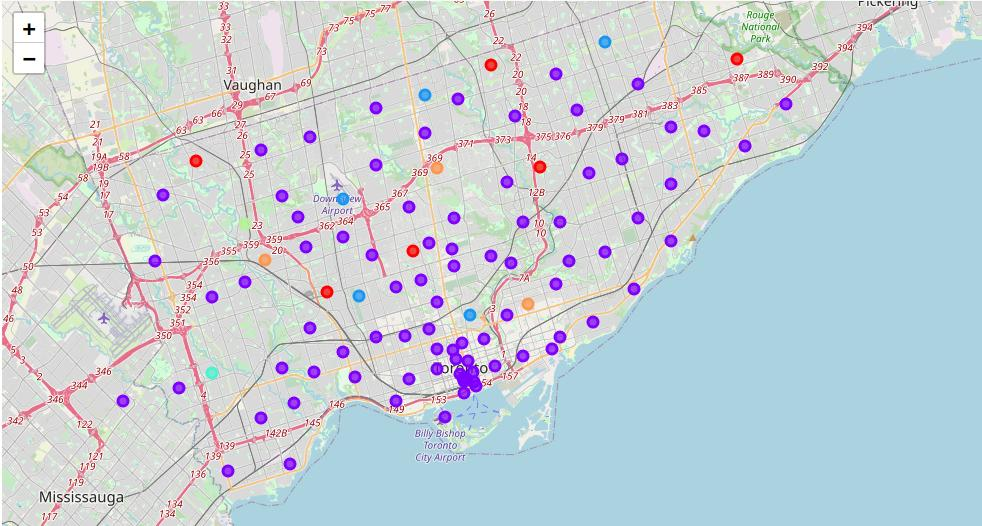

In [50]:
Image('Toronto_neighborhoods_clustered.jpg')

#### Below is an examination of clusters.

Cluster 0

In [41]:
print('There are {} neighborhoods in cluster 0.'.format(toronto_merged[toronto_merged['Cluster Labels'] == 0].shape[0]))
toronto_merged[toronto_merged['Cluster Labels'] == 0]

There are 6 neighborhoods in cluster 0.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Fast Food Restaurant,Food & Drink Shop,Park,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Mexican Restaurant
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353,0.0,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant,Luggage Store
27,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,Fast Food Restaurant,Mediterranean Restaurant,Pool,Golf Course,Dog Run,Miscellaneous Shop,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
50,M9L,North York,Humber Summit,43.756303,-79.565963,0.0,Gym,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
56,M6M,York,Del Ray / Mount Dennis / Keelsdale and Silvert...,43.691116,-79.476013,0.0,Fast Food Restaurant,Fried Chicken Joint,Restaurant,Sandwich Place,Discount Store,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant
62,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0.0,Fast Food Restaurant,Garden,Music Venue,Home Service,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop


Cluster 1

In [42]:
print('There are {} neighborhoods in cluster 1.'.format(toronto_merged[toronto_merged['Cluster Labels'] == 1].shape[0]))
toronto_merged[toronto_merged['Cluster Labels'] == 1]

There are 83 neighborhoods in cluster 1.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Grocery Store,Nail Salon,Coffee Shop,Hockey Arena,Portuguese Restaurant,Accessories Store,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,1.0,Coffee Shop,Café,Bakery,Pub,Park,Theater,Restaurant,Gym / Fitness Center,Event Space,Chocolate Shop
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,1.0,Clothing Store,Accessories Store,Furniture / Home Store,Coffee Shop,Carpet Store,Miscellaneous Shop,Boutique,Vietnamese Restaurant,Hockey Arena,Monument / Landmark
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Café,Diner,Yoga Studio,Portuguese Restaurant,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place
7,M3B,North York,Don Mills North,43.745906,-79.352188,1.0,Caribbean Restaurant,Athletics & Sports,Café,Dessert Shop,Japanese Restaurant,Gym,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North,43.653654,-79.506944,1.0,River,Pool,Accessories Store,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Mediterranean Restaurant,Men's Store,Fast Food Restaurant,Pub
100,M7Y,East Toronto,Enclave of M4L,43.662744,-79.321558,1.0,Light Rail Station,Gym / Fitness Center,Garden Center,Comic Shop,Park,Restaurant,Butcher,Burrito Place,Skate Park,Brewery
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...,43.636258,-79.498509,1.0,Business Service,Pool,Baseball Field,Accessories Store,Mobile Phone Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop


Cluster 2

In [43]:
print('There is {} neighborhood in cluster 2.'.format(toronto_merged[toronto_merged['Cluster Labels'] == 2].shape[0]))
toronto_merged[toronto_merged['Cluster Labels'] == 2]

There is 5 neighborhood in cluster 2.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,2.0,Park,Women's Store,Pool,Accessories Store,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
40,M3K,North York,Downsview East,43.737473,-79.464763,2.0,Airport,Park,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station
52,M2M,North York,Willowdale / Newtonbrook,43.789053,-79.408493,2.0,Park,Accessories Store,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station
85,M1V,Scarborough,Milliken / Agincourt North / Steeles East / L'...,43.815252,-79.284577,2.0,Playground,Park,Arts & Crafts Store,Intersection,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2.0,Park,Playground,Trail,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant


Cluster 3

In [44]:
print('There are {} neighborhoods in cluster 3.'.format(toronto_merged[toronto_merged['Cluster Labels'] == 3].shape[0]))
toronto_merged[toronto_merged['Cluster Labels'] == 3]

There are 1 neighborhoods in cluster 3.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,M9B,Etobicoke,West Deane Park / Princess Gardens / Martin Gr...,43.650943,-79.554724,3.0,Bakery,Accessories Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant,Motel


Cluster 4

In [45]:
print('There are {} neighborhoods in cluster 4.'.format(toronto_merged[toronto_merged['Cluster Labels'] == 4].shape[0]))
toronto_merged[toronto_merged['Cluster Labels'] == 4]

There are 1 neighborhoods in cluster 4.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,M9M,North York,Humberlea / Emery,43.724766,-79.532242,4.0,Baseball Field,Accessories Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant,Motel


Cluster 5

In [46]:
print('There are {} neighborhoods in cluster 5.'.format(toronto_merged[toronto_merged['Cluster Labels'] == 5].shape[0]))
toronto_merged[toronto_merged['Cluster Labels'] == 5]

There are 3 neighborhoods in cluster 5.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106,5.0,Park,Convenience Store,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
64,M9N,York,Weston,43.706876,-79.518188,5.0,Park,Convenience Store,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
66,M2P,North York,York Mills West,43.752758,-79.400049,5.0,Park,Convenience Store,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop


Omitted from clustering

In [47]:
print('The following neighborhoods were omitted from clustering, since venue data could not be obtained for them.')
toronto_merged[np.isnan(toronto_merged['Cluster Labels'])]

The following neighborhoods were omitted from clustering, since venue data could not be obtained for them.


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,M2L,North York,York Mills / Silver Hills,43.757490,-79.374714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,M4T,Central Toronto,Moore Park / Summerhill East,43.689574,-79.383160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
